# Beethoven

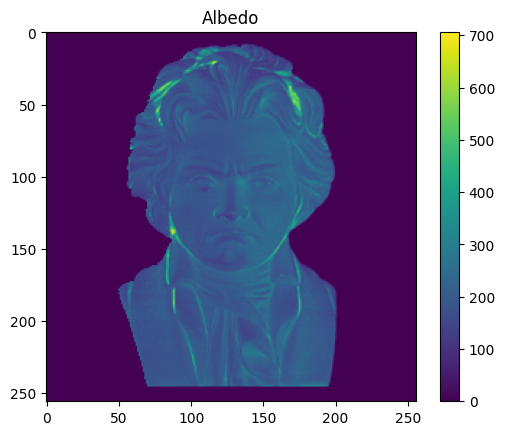

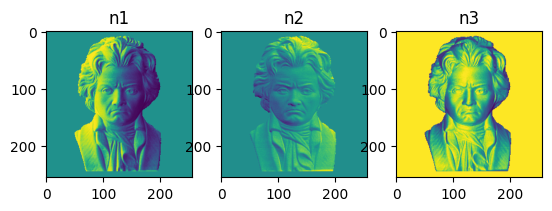

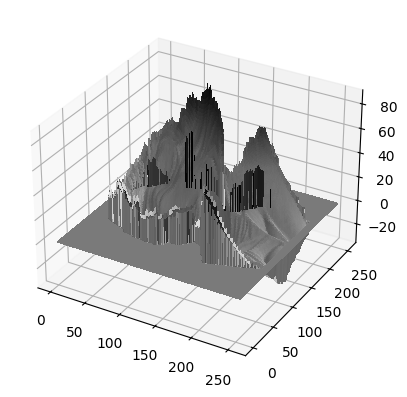

In [13]:
# -*- coding: utf-8 -*-
"""
Run Beethoven reconstruction code 

Author: Francois Lauze, University of Copenhagen
Date: Mon Jan  4 14:11:54 2016
"""


import numpy as np
import ps_utils
import numpy.linalg as la
import matplotlib.pyplot as plt

# read Beethoven data
I, mask, S = ps_utils.read_data_file('Beethoven')

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m,n = mask.shape

# for each mask pixel, collect image data
J = np.zeros((3, len(nz[0])))
for i in range(3):
    Ii = I[:,:,i]
    J[i,:] = Ii[nz]


# solve for M = rho*N
iS = la.inv(S)
M = np.dot(iS, J)

# get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3,1))

# show albedo inside mask
rho_img = np.zeros((m, n))
rho_img[nz] = Rho
plt.figure()
plt.imshow(rho_img)
plt.title("Albedo")
plt.colorbar()

# normal components in image form
n1 = np.zeros((m,n))
n2 = np.zeros((m,n))
n3 = np.ones((m,n))
n1[nz] = N[0,:]
n2[nz] = N[1,:]
n3[nz] = N[2,:]

_,(ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(n1)
ax1.set_title("n1")
ax2.imshow(n2)
ax2.set_title("n2")
ax3.imshow(n3)
ax3.set_title("n3")
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
z = np.nan_to_num(z)

ps_utils.display_surface(z)